# Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [2]:
df_raw = pd.read_csv("results.csv", sep=';', header=None, names=["algo", "threads", "t", "t1", "t2", "t3", "t4"])
df_raw.head()

,algo,threads,t,t1,t2,t3,t4
0,sort_2,2,1.817408,0.044978,0.735976,0.954674,0.081692
1,sort_2,2,1.817840,0.045133,0.738687,0.952506,0.081428
2,sort_2,2,1.804927,0.044937,0.726126,0.952233,0.081538
3,sort_2,2,1.819119,0.044985,0.741842,0.950891,0.081289
4,sort_2,2,1.824612,0.044888,0.743136,0.955235,0.081253


In [3]:
df = df_raw.groupby(['algo', 'threads']).agg(
    t_mean=('t', 'mean'), t_std=('t', 'std'),
    t1_mean=('t1', 'mean'), t1_std=('t1', 'std'),
    t2_mean=('t2', 'mean'), t2_std=('t2', 'std'),
    t3_mean=('t3', 'mean'), t3_std=('t3', 'std'),
    t4_mean=('t4', 'mean'), t4_std=('t4', 'std')
).reset_index()

df.head()

,algo,threads,t_mean,t_std,t1_mean,t1_std,t2_mean,t2_std,t3_mean,t3_std,t4_mean,t4_std
0,sort_2,1,2.845361,0.011017,0.089103,0.000120,0.704126,0.009303,1.927204,0.005320,0.124916,0.000077
1,sort_2,2,1.939714,0.309255,0.045004,0.000138,0.861588,0.312720,0.951343,0.004975,0.081690,0.000678
2,sort_2,3,1.262839,0.004610,0.029622,0.000098,0.532789,0.003124,0.642240,0.002880,0.058084,0.000179
3,sort_2,4,0.990199,0.005359,0.022256,0.000027,0.440472,0.004839,0.482174,0.001562,0.045178,0.000074
4,sort_2,5,0.795335,0.004698,0.018081,0.000036,0.354581,0.004214,0.385580,0.000983,0.036951,0.000028


# Execution time

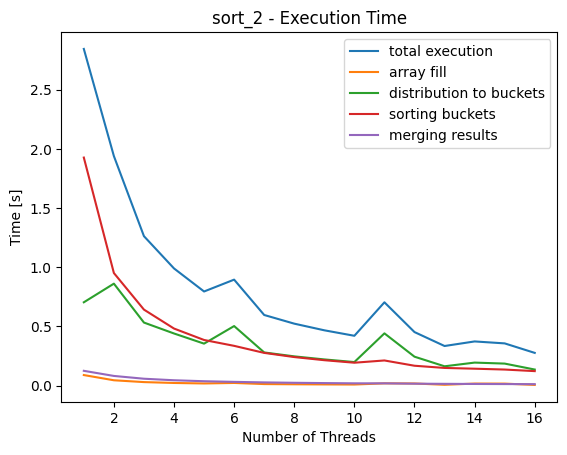

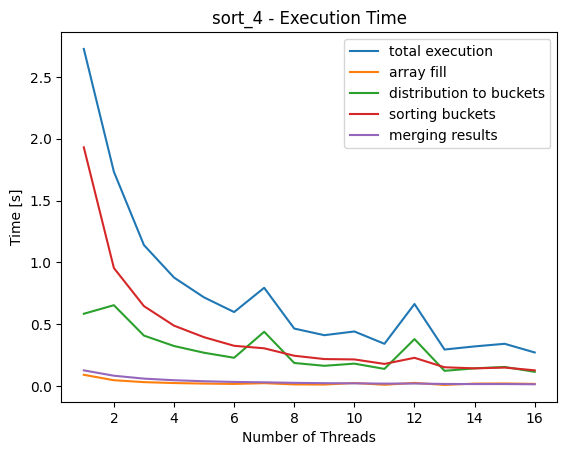

In [4]:
for series in df.groupby(["algo"]):
    series_df = series[1]
    series_nm = series[0][0]
    
    plt.plot(series_df["threads"], series_df["t_mean"], label="total execution")
    plt.plot(series_df["threads"], series_df["t1_mean"], label="array fill")
    plt.plot(series_df["threads"], series_df["t2_mean"], label="distribution to buckets")
    plt.plot(series_df["threads"], series_df["t3_mean"], label="sorting buckets")
    plt.plot(series_df["threads"], series_df["t4_mean"], label="merging results")
    
    plt.title(f"{series_nm} - Execution Time")
    plt.legend()
    plt.xlabel("Number of Threads")
    plt.ylabel("Time [s]")
    plt.show()

# Speedup

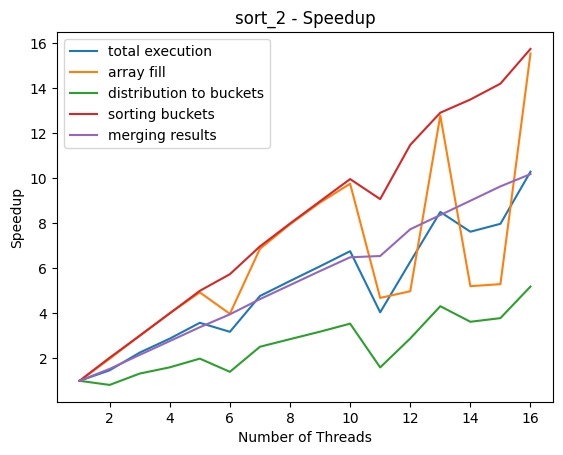

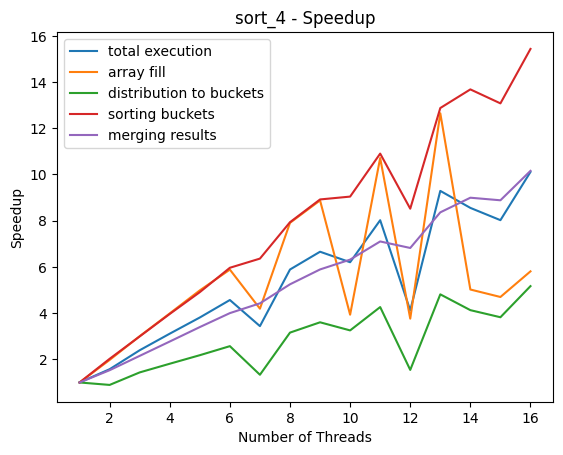

In [5]:
for series in df.groupby(["algo"]):
    series_df = series[1]
    series_nm = series[0][0]
    
    T1 = series_df[series_df["threads"] == 1]["t_mean"].values[0]
    T11 = series_df[series_df["threads"] == 1]["t1_mean"].values[0]
    T12 = series_df[series_df["threads"] == 1]["t2_mean"].values[0]
    T13 = series_df[series_df["threads"] == 1]["t3_mean"].values[0]
    T14 = series_df[series_df["threads"] == 1]["t4_mean"].values[0]
    
    plt.plot(series_df["threads"], T1/series_df["t_mean"], label="total execution")
    plt.plot(series_df["threads"], T11/series_df["t1_mean"], label="array fill")
    plt.plot(series_df["threads"], T12/series_df["t2_mean"], label="distribution to buckets")
    plt.plot(series_df["threads"], T13/series_df["t3_mean"], label="sorting buckets")
    plt.plot(series_df["threads"], T14/series_df["t4_mean"], label="merging results")
    
    plt.title(f"{series_nm} - Speedup")
    plt.legend()
    plt.xlabel("Number of Threads")
    plt.ylabel("Speedup")
    plt.show()